In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## 함수: PCA, 스크리그림

In [2]:
#PCA함수
def PCA_func(df):
    x = StandardScaler().fit_transform(df) #변수 표준화
    pca = PCA(n_components = 1) #주성분 1개로
    pca.fit(x)
    
    print('주성분분산: ', pca.explained_variance_)
    print('주성분분산 비율: ', pca.explained_variance_ratio_)
    print('주성분계수: ', np.round(pca.components_, 3))

In [3]:
#스크리그림 함수
def scree(df):
    x = StandardScaler().fit_transform(df)
    pca_init = PCA(n_components=len(df.columns)) 
    pca_init.fit(x)
    
    #분산
    plt.figure()
    plt.subplot(121)
    plt.plot(pca_init.explained_variance_, 'o-')
    plt.title('Scree Plot_variance')
    plt.xlabel('Components')
    plt.ylabel('Explained Variance')
    plt.show()
    
    #분산비율
    plt.subplot(122)
    plt.plot(np.cumsum(pca_init.explained_variance_ratio_), 'o-')
    plt.title('Scree Plot_variance ratio')
    plt.xlabel('Components')
    plt.ylabel('Explained Variance')
    plt.show()

## 1. [개인건강] 소분류별 순위

In [4]:
#데이터읽기
health = pd.read_csv("./preprocessing/personal_health_middle_classification_rank.csv")
health.head(3)

,시도,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15
0,서울,11,9,16,14,7,5,13,1,2,2,4,17,5,3,3
1,부산,12,6,14,12,17,9,17,17,17,17,16,14,16,16,16
2,대구,4,14,13,9,14,11,16,4,13,14,10,14,12,12,17


In [5]:
#분석변수 선택하기
physical = health.iloc[:, 1:9]
mental = health.iloc[:, 9: ]

### 상관분석

In [6]:
physical.corr()
mental.corr()

,T9,T10,T11,T12,T13,T14,T15
T9,1.000000,0.732807,0.883785,0.012858,0.796206,0.872679,0.771814
T10,0.732807,1.000000,0.650354,0.060329,0.524754,0.785036,0.776076
T11,0.883785,0.650354,1.000000,-0.063171,0.565435,0.861817,0.796764
T12,0.012858,0.060329,-0.063171,1.000000,-0.145885,0.082135,0.002432
T13,0.796206,0.524754,0.565435,-0.145885,1.000000,0.617668,0.532957
T14,0.872679,0.785036,0.861817,0.082135,0.617668,1.000000,0.757556
T15,0.771814,0.776076,0.796764,0.002432,0.532957,0.757556,1.000000


/Users/parksihyeon/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<function matplotlib.pyplot.show(close=None, block=None)>

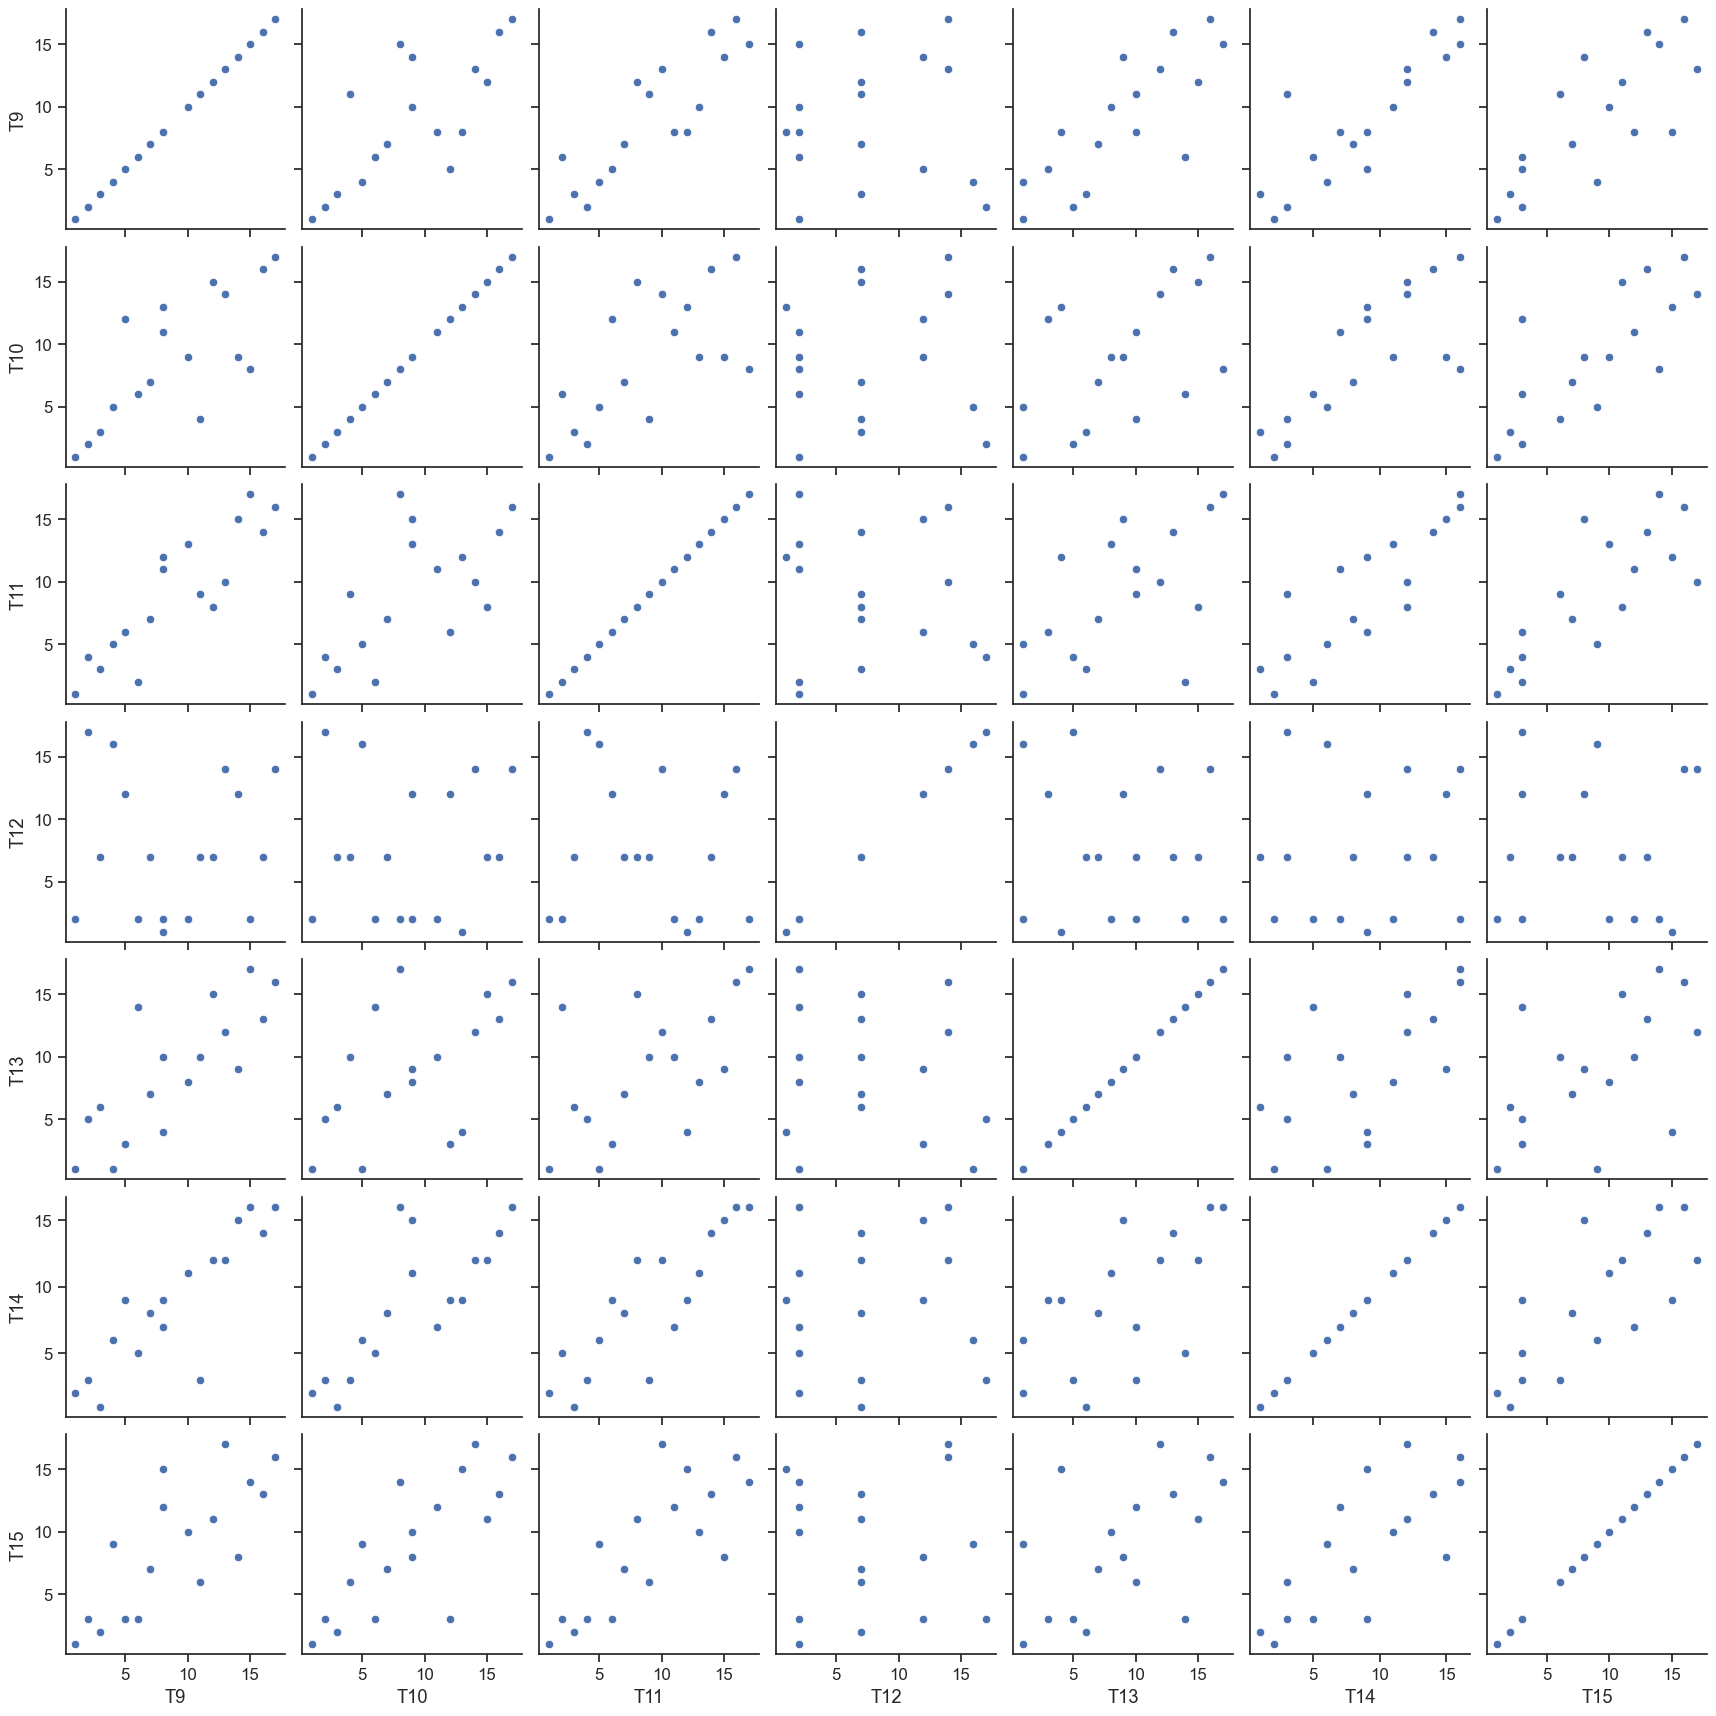

In [7]:
sns.set(font_scale=1.1)
sns.set_style('ticks')
sns.pairplot(mental, diag_kind=None)
plt.show

### 신체, 정신 각 지표 주성분계수 구하기

In [8]:
print('신체', '-'*10)
PCA_func(physical)
print('정신', '-'*10)
PCA_func(mental)

신체 ----------
주성분분산:  [3.41715471]
주성분분산 비율:  [0.4020182]
주성분계수:  [[-0.254  0.301 -0.419 -0.392 -0.485 -0.253 -0.435 -0.169]]
정신 ----------
주성분분산:  [4.95841137]
주성분분산 비율:  [0.66667716]
주성분계수:  [[-0.444 -0.392 -0.42   0.003 -0.349 -0.431 -0.407]]


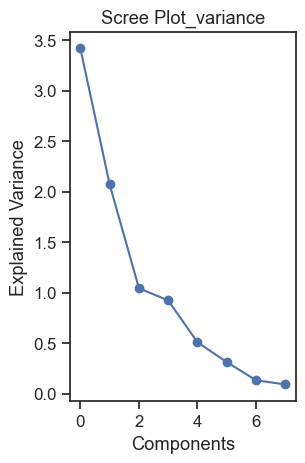

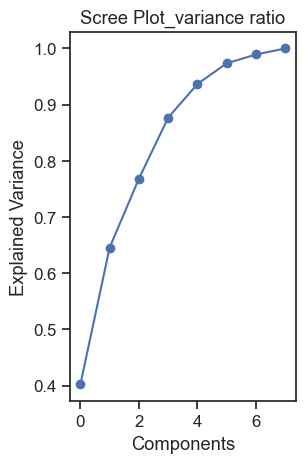

In [9]:
scree(physical)

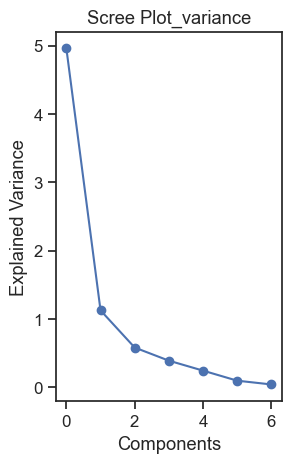

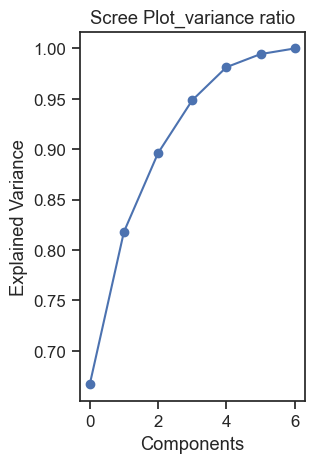

In [10]:
scree(mental)

## 2. [개인건강] 세부 질문별 순위

In [11]:
#데이터읽기
health = pd.read_csv("./preprocessing/personal_health_all_element_rank.csv")
health.head(3)

,시도,T1,T2,T3,T4,T5,T6,T7,T8,T9,...,T35,T36,T37,T38,T39,T40,T41,T42,T43,T44
0,서울,12,13,4,14,12,2,16,13,15,...,4,5,2,2,4,5,17,5,3,3
1,부산,9,10,13,12,3,9,14,13,6,...,14,17,17,17,17,14,14,16,16,16
2,대구,4,6,8,10,6,17,13,10,10,...,6,11,13,14,13,8,14,12,12,17


In [12]:
#분석변수 선택
hdata = health.iloc[:, 1:]

In [13]:
hdata.corr()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,...,T35,T36,T37,T38,T39,T40,T41,T42,T43,T44
T1,1.000000,0.606137,0.157873,-0.076646,-0.232578,-0.174317,-0.088026,0.027768,-0.388339,0.323164,...,0.173567,0.282817,0.045466,-0.128215,-0.027763,0.154770,-0.116692,0.208584,0.140937,0.061965
T2,0.606137,1.000000,0.234166,-0.106799,-0.133548,-0.327809,0.160102,0.288743,0.051071,0.040768,...,-0.033882,0.252740,0.246142,-0.104628,-0.018485,0.259109,-0.048747,0.447720,0.113858,-0.024581
T3,0.157873,0.234166,1.000000,0.241978,-0.536734,0.191201,0.096109,0.316669,0.041878,0.221686,...,0.053079,0.418489,0.271751,0.301408,-0.009070,0.500187,-0.224697,0.108297,0.355666,0.307892
T4,-0.076646,-0.106799,0.241978,1.000000,-0.169628,0.240985,0.205571,0.144445,0.112416,0.286992,...,-0.384213,-0.283431,-0.204639,-0.037766,-0.380529,-0.310279,0.581965,-0.194893,0.031767,-0.145248
T5,-0.232578,-0.133548,-0.536734,-0.169628,1.000000,-0.361975,-0.451906,-0.637090,-0.125855,-0.398054,...,0.134664,-0.104375,-0.247625,-0.105903,0.039881,-0.302173,-0.027681,-0.223297,-0.090340,-0.272395
T6,-0.174317,-0.327809,0.191201,0.240985,-0.361975,1.000000,-0.082332,-0.051085,-0.111684,0.102583,...,-0.075937,-0.097121,-0.095855,0.168807,-0.068409,-0.272451,0.002520,-0.124017,-0.049055,0.119258
T7,-0.088026,0.160102,0.096109,0.205571,-0.451906,-0.082332,1.000000,0.893938,0.655413,0.227238,...,-0.597722,0.024088,0.236550,-0.057173,0.204573,0.211732,0.489747,0.072479,-0.006201,0.208824
T8,0.027768,0.288743,0.316669,0.144445,-0.637090,-0.051085,0.893938,1.000000,0.605131,0.158305,...,-0.540570,0.108658,0.321920,-0.094626,0.035272,0.302274,0.230056,0.219593,0.067650,0.245531
T9,-0.388339,0.051071,0.041878,0.112416,-0.125855,-0.111684,0.655413,0.605131,1.000000,-0.155513,...,-0.391339,0.008052,0.074947,-0.026551,-0.098286,0.240842,0.099108,0.060041,-0.190853,0.135904
T10,0.323164,0.040768,0.221686,0.286992,-0.398054,0.102583,0.227238,0.158305,-0.155513,1.000000,...,-0.078533,-0.070378,-0.142322,-0.159873,0.004540,-0.229318,0.245570,-0.082549,-0.107831,-0.270297


In [28]:
PCA_func(hdata)

주성분분산:  [14.58258308]
주성분분산 비율:  [0.31192691]
주성분계수:  [[ 0.039 -0.05  -0.083 -0.16  -0.147 -0.004 -0.257 -0.251 -0.202  0.018
  -0.115 -0.247 -0.212 -0.204 -0.096 -0.204 -0.241 -0.216 -0.162 -0.162
  -0.221 -0.021 -0.077  0.011 -0.023 -0.205 -0.071  0.052 -0.209 -0.115
  -0.22  -0.195 -0.219 -0.045  0.119 -0.045 -0.105 -0.069 -0.108 -0.142
   0.111 -0.073 -0.084 -0.123]]


## 3. [개인건강] 세부 질문별 분율

In [15]:
health = pd.read_csv("./preprocessing/personal_health_all_element_percent.csv")
health.head(10)

,시도,T1,T2,T3,T4,T5,T6,T7,T8,T9,...,T35,T36,T37,T38,T39,T40,T41,T42,T43,T44
0,서울,17.7,42.0,24.6,11.0,8.2,22.5,3.5,2.1,0.8,...,38.6,22.8,39.6,27.5,14.5,5.6,5.9,56.7,19.0,13.4
1,부산,17.1,41.6,26.0,12.1,9.2,21.8,3.6,2.1,1.1,...,34.2,18.2,32.6,21.5,10.7,4.4,6.1,61.4,14.1,10.9
2,대구,16.1,40.1,25.4,12.6,8.6,19.2,3.7,2.4,1.0,...,38.0,21.4,35.0,24.9,11.8,5.1,6.1,59.4,16.7,10.1
3,인천,18.7,39.0,24.7,12.6,9.4,22.0,4.9,2.7,1.3,...,35.3,22.6,36.9,26.3,14.0,4.8,6.3,57.6,17.9,12.5
4,광주,15.8,41.1,26.0,10.6,8.4,21.4,5.2,3.4,1.2,...,37.2,23.1,37.4,25.2,14.1,5.2,6.2,56.1,17.8,13.4
5,대전,17.6,40.0,24.6,11.0,8.5,20.8,4.3,2.4,1.1,...,39.5,23.3,38.5,26.6,13.6,6.0,6.0,54.5,18.3,12.1
6,울산,19.1,45.7,26.9,11.3,8.7,22.1,4.5,2.0,1.0,...,37.7,19.5,34.3,25.9,9.9,4.4,6.4,62.6,14.1,11.2
7,세종,15.3,41.7,24.4,8.1,8.6,22.3,3.0,1.6,0.6,...,39.1,22.9,36.1,27.0,13.1,4.5,6.3,58.8,19.0,12.7
8,경기,16.6,41.5,25.9,10.7,8.5,21.8,4.0,2.4,0.8,...,41.5,22.4,39.0,27.1,14.9,5.8,6.3,56.9,20.1,13.5
9,강원,16.6,40.0,25.5,14.4,10.7,21.4,5.0,3.1,0.9,...,33.8,19.8,36.8,25.0,12.6,4.1,6.5,56.3,17.8,11.0


In [16]:
#작을수록 좋은 컬럼들 뽑아내기
df1 = health.iloc[:, 4:10]
df2 = health.iloc[:, 11:21]
df3 = health.iloc[:, 22]
df4 = health.iloc[:, 26:29]
df5 = health.iloc[:, 34:41]
df6 = health.iloc[:, 43:]

In [17]:
pd.concat([df1,df2,df3,df4,df5,df6],axis=1)

,T4,T5,T6,T7,T8,T9,T11,T12,T13,T14,...,T28,T34,T35,T36,T37,T38,T39,T40,T43,T44
0,11.0,8.2,22.5,3.5,2.1,0.8,60.7,2.9,1.8,17.1,...,35.1,5.9,38.6,22.8,39.6,27.5,14.5,5.6,19.0,13.4
1,12.1,9.2,21.8,3.6,2.1,1.1,64.9,2.5,1.7,19.7,...,32.0,4.6,34.2,18.2,32.6,21.5,10.7,4.4,14.1,10.9
2,12.6,8.6,19.2,3.7,2.4,1.0,65.1,2.5,1.9,20.1,...,34.4,6.1,38.0,21.4,35.0,24.9,11.8,5.1,16.7,10.1
3,12.6,9.4,22.0,4.9,2.7,1.3,67.1,3.3,1.8,22.0,...,38.7,4.5,35.3,22.6,36.9,26.3,14.0,4.8,17.9,12.5
4,10.6,8.4,21.4,5.2,3.4,1.2,68.3,4.0,2.1,21.9,...,35.4,5.2,37.2,23.1,37.4,25.2,14.1,5.2,17.8,13.4
5,11.0,8.5,20.8,4.3,2.4,1.1,64.1,2.9,1.8,20.5,...,30.6,5.2,39.5,23.3,38.5,26.6,13.6,6.0,18.3,12.1
6,11.3,8.7,22.1,4.5,2.0,1.0,67.9,3.7,2.7,21.1,...,29.9,4.7,37.7,19.5,34.3,25.9,9.9,4.4,14.1,11.2
7,8.1,8.6,22.3,3.0,1.6,0.6,43.6,1.8,1.7,13.6,...,42.7,4.1,39.1,22.9,36.1,27.0,13.1,4.5,19.0,12.7
8,10.7,8.5,21.8,4.0,2.4,0.8,61.5,3.0,2.0,20.6,...,34.6,5.8,41.5,22.4,39.0,27.1,14.9,5.8,20.1,13.5
9,14.4,10.7,21.4,5.0,3.1,0.9,61.5,3.9,2.6,23.9,...,32.3,4.9,33.8,19.8,36.8,25.0,12.6,4.1,17.8,11.0


In [18]:
#변환(변수최댓값 - 변수값): 작을수록 좋은 값들
health.T4 = np.max(health.T4) - health.T4
health.T5 = np.max(health.T5) - health.T5
health.T6 = np.max(health.T6) - health.T6
health.T7 = np.max(health.T7) - health.T7
health.T8 = np.max(health.T8) - health.T8
health.T9 = np.max(health.T9) - health.T9
health.T11 = np.max(health.T11) - health.T11
health.T12 = np.max(health.T12) - health.T12
health.T13 = np.max(health.T13) - health.T13
health.T14 = np.max(health.T14) - health.T14
health.T15 = np.max(health.T15) - health.T15
health.T16 = np.max(health.T16) - health.T16
health.T17 = np.max(health.T17) - health.T17
health.T18 = np.max(health.T18) - health.T18
health.T19 = np.max(health.T19) - health.T19
health.T20 = np.max(health.T20) - health.T20
health.T22 = np.max(health.T22) - health.T22
health.T26 = np.max(health.T26) - health.T26
health.T27 = np.max(health.T27) - health.T27
health.T28 = np.max(health.T28) - health.T28
health.T34 = np.max(health.T34) - health.T34
health.T35 = np.max(health.T35) - health.T35
health.T36 = np.max(health.T36) - health.T36
health.T37 = np.max(health.T37) - health.T37
health.T38 = np.max(health.T38) - health.T38
health.T39 = np.max(health.T39) - health.T39
health.T40 = np.max(health.T40) - health.T40
health.T43 = np.max(health.T43) - health.T43
health.T44 = np.max(health.T44) - health.T44

In [19]:
health

,시도,T1,T2,T3,T4,T5,T6,T7,T8,T9,...,T35,T36,T37,T38,T39,T40,T41,T42,T43,T44
0,서울,17.7,42.0,24.6,4.3,3.8,0.8,2.4,1.9,1.4,...,2.9,0.5,0.4,1.1,0.9,1.3,5.9,56.7,1.1,1.4
1,부산,17.1,41.6,26.0,3.2,2.8,1.5,2.3,1.9,1.1,...,7.3,5.1,7.4,7.1,4.7,2.5,6.1,61.4,6.0,3.9
2,대구,16.1,40.1,25.4,2.7,3.4,4.1,2.2,1.6,1.2,...,3.5,1.9,5.0,3.7,3.6,1.8,6.1,59.4,3.4,4.7
3,인천,18.7,39.0,24.7,2.7,2.6,1.3,1.0,1.3,0.9,...,6.2,0.7,3.1,2.3,1.4,2.1,6.3,57.6,2.2,2.3
4,광주,15.8,41.1,26.0,4.7,3.6,1.9,0.7,0.6,1.0,...,4.3,0.2,2.6,3.4,1.3,1.7,6.2,56.1,2.3,1.4
5,대전,17.6,40.0,24.6,4.3,3.5,2.5,1.6,1.6,1.1,...,2.0,0.0,1.5,2.0,1.8,0.9,6.0,54.5,1.8,2.7
6,울산,19.1,45.7,26.9,4.0,3.3,1.2,1.4,2.0,1.2,...,3.8,3.8,5.7,2.7,5.5,2.5,6.4,62.6,6.0,3.6
7,세종,15.3,41.7,24.4,7.2,3.4,1.0,2.9,2.4,1.6,...,2.4,0.4,3.9,1.6,2.3,2.4,6.3,58.8,1.1,2.1
8,경기,16.6,41.5,25.9,4.6,3.5,1.5,1.9,1.6,1.4,...,0.0,0.9,1.0,1.5,0.5,1.1,6.3,56.9,0.0,1.3
9,강원,16.6,40.0,25.5,0.9,1.3,1.9,0.9,0.9,1.3,...,7.7,3.5,3.2,3.6,2.8,2.8,6.5,56.3,2.3,3.8


In [20]:
hdata = health.iloc[:, 1:]

In [21]:
hdata.corr()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,...,T35,T36,T37,T38,T39,T40,T41,T42,T43,T44
T1,1.000000,0.653272,0.214701,-0.347465,-0.143202,-0.213566,-0.171711,-0.043135,-0.480176,-0.313510,...,0.049168,0.152583,0.039963,-0.087288,0.193075,0.031054,0.065968,0.219359,0.185042,0.051957
T2,0.653272,1.000000,0.372745,0.114900,0.021543,-0.204740,0.170584,0.200989,-0.178989,0.114185,...,-0.224328,0.237069,0.222475,-0.000343,0.367057,0.117049,0.060180,0.484315,0.283580,0.077642
T3,0.214701,0.372745,1.000000,-0.074068,0.376072,0.119220,0.185386,0.376176,0.279072,-0.168825,...,-0.141799,0.400123,0.277315,0.279936,0.388772,0.496000,0.224496,0.151229,0.377705,0.249421
T4,-0.347465,0.114900,-0.074068,1.000000,0.646131,0.000441,0.617180,0.569696,0.520420,0.079706,...,-0.604804,-0.431800,-0.095989,-0.184673,-0.191298,-0.035957,-0.448127,-0.091921,-0.161746,-0.169825
T5,-0.143202,0.021543,0.376072,0.646131,1.000000,0.144943,0.497008,0.630137,0.584201,-0.139751,...,-0.543020,-0.373312,-0.271885,-0.257913,-0.233420,0.071700,-0.461217,-0.297035,-0.201718,-0.130461
T6,-0.213566,-0.204740,0.119220,0.000441,0.144943,1.000000,0.068738,0.006386,-0.096935,-0.115175,...,-0.143194,-0.104149,-0.012234,0.120340,-0.129511,-0.304352,-0.056494,-0.163135,-0.108930,0.173808
T7,-0.171711,0.170584,0.185386,0.617180,0.497008,0.068738,1.000000,0.894716,0.689541,-0.105475,...,-0.569927,0.077105,0.229503,0.170743,0.228834,0.343608,-0.489521,0.128329,0.131786,0.312453
T8,-0.043135,0.200989,0.376176,0.569696,0.630137,0.006386,0.894716,1.000000,0.731316,-0.157573,...,-0.528723,0.106794,0.193650,0.047911,0.266959,0.421753,-0.311173,0.133249,0.168434,0.260428
T9,-0.480176,-0.178989,0.279072,0.520420,0.584201,-0.096935,0.689541,0.731316,1.000000,0.120647,...,-0.321549,0.011847,0.068848,0.080285,0.122240,0.533969,-0.204163,-0.074179,0.017622,0.270535
T10,-0.313510,0.114185,-0.168825,0.079706,-0.139751,-0.115175,-0.105475,-0.157573,0.120647,1.000000,...,0.063411,0.178090,0.050166,-0.033544,0.222539,0.108670,0.190570,0.088978,0.040548,0.209158


In [29]:
PCA_func(hdata)

주성분분산:  [14.58258308]
주성분분산 비율:  [0.31192691]
주성분계수:  [[ 0.039 -0.05  -0.083 -0.16  -0.147 -0.004 -0.257 -0.251 -0.202  0.018
  -0.115 -0.247 -0.212 -0.204 -0.096 -0.204 -0.241 -0.216 -0.162 -0.162
  -0.221 -0.021 -0.077  0.011 -0.023 -0.205 -0.071  0.052 -0.209 -0.115
  -0.22  -0.195 -0.219 -0.045  0.119 -0.045 -0.105 -0.069 -0.108 -0.142
   0.111 -0.073 -0.084 -0.123]]


## 4. [외부환경요인] 소분류별 순위

In [23]:
#데이터읽기
health = pd.read_csv("./preprocessing/external_factor_middle_classification_rank.csv")
health.head(3)

,시도,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15
0,강원,3,1,9,12,7,8,5,11,10,12,1,3,11,14,8
1,경기,10,10,1,2,11,2,2,5,9,17,14,11,13,9,4
2,경남,5,9,10,9,10,5,6,10,16,13,13,17,14,10,7


In [24]:
#분석변수 선택하기
dan = health.iloc[:, 1:5]
commu = health.iloc[:, 5:8]
center = health.iloc[:, 8:10]
edu = health.iloc[:, 10:]

In [25]:
#상관관계 확인
edu.corr()

,T10,T11,T12,T13,T14,T15
T10,1.000000,0.268022,-0.063561,0.202905,0.222463,0.082602
T11,0.268022,1.000000,0.302270,-0.131634,-0.343710,0.297852
T12,-0.063561,0.302270,1.000000,0.252451,-0.078431,-0.079317
T13,0.202905,-0.131634,0.252451,1.000000,0.536765,-0.156155
T14,0.222463,-0.343710,-0.078431,0.536765,1.000000,0.185899
T15,0.082602,0.297852,-0.079317,-0.156155,0.185899,1.000000


/Users/parksihyeon/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<function matplotlib.pyplot.show(close=None, block=None)>

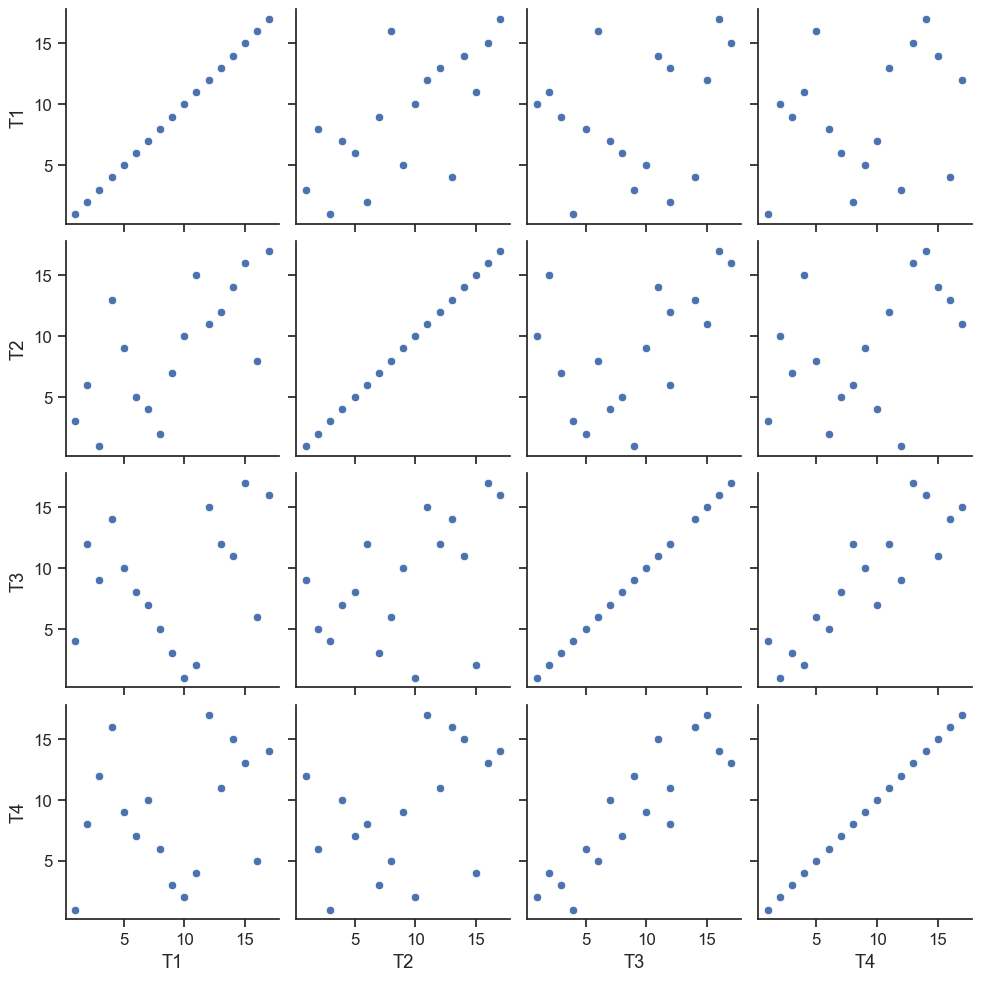

In [26]:
sns.set(font_scale=1.1)
sns.set_style('ticks')
sns.pairplot(dan, diag_kind=None)
plt.show

### 위험요인, 공동체, 지역사회, 교육 각 지표 주성분계수

In [30]:
print('위험요인', '-'*10)
PCA_func(dan)
print('공동체', '-'*10)
PCA_func(commu)
print('지역사회', '-'*10)
PCA_func(center)
print('교육', '-'*10)
PCA_func(edu)

위험요인 ----------
주성분분산:  [2.66832861]
주성분분산 비율:  [0.62784203]
주성분계수:  [[0.413 0.509 0.537 0.531]]
공동체 ----------
주성분분산:  [2.38604248]
주성분분산 비율:  [0.74856235]
주성분계수:  [[-0.523 -0.612 -0.593]]
지역사회 ----------
주성분분산:  [1.67073606]
주성분분산 비율:  [0.78622874]
주성분계수:  [[0.707 0.707]]
교육 ----------
주성분분산:  [1.85527926]
주성분분산 비율:  [0.2910242]
주성분계수:  [[-0.219  0.376  0.025 -0.608 -0.657  0.087]]


In [31]:
hdata = health.iloc[:, 1:]
PCA_func(hdata)

주성분분산:  [5.19731523]
주성분분산 비율:  [0.32610605]
주성분계수:  [[ 0.261  0.293  0.308  0.288  0.329  0.332  0.36   0.117 -0.075 -0.107
   0.25   0.137 -0.307 -0.315  0.123]]


## 5. [외부환경요인] 세부 질문별 순위

In [ ]:
#데이터읽기
health = pd.read_csv("./preprocessing/external_factor_all_element_rank.csv")
health.head(3)

In [ ]:
#분석변수 선택
hdata = health.iloc[:, 1:]
#변수별 상관계수
hdata.corr()

In [32]:
PCA_func(hdata)

주성분분산:  [5.19731523]
주성분분산 비율:  [0.32610605]
주성분계수:  [[ 0.261  0.293  0.308  0.288  0.329  0.332  0.36   0.117 -0.075 -0.107
   0.25   0.137 -0.307 -0.315  0.123]]


## [외부환경요인] 세부 질문별 분율

In [38]:
#데이터읽기
health = pd.read_csv("./preprocessing/external_factor_all_element_likert.csv")
health.head(5)

,시도,T1,T2,T3,T4,T5,T6,T7,T8,T9,...,T64,T65,T66,T67,T68,T69,T70,T71,T72,T73
0,강원,12.230216,7.913669,3.597122,3.309353,0.863309,0.287770,9.640288,1.582734,1.582734,...,54.37,61.19,66.16,56.33,70.53,60.13,61.22,90.5,53.1,43.5
1,경기,10.973154,6.543624,2.281879,2.785235,2.013423,0.503356,8.221477,1.610738,2.046980,...,57.42,52.79,49.79,44.47,83.02,52.67,74.14,92.3,53.5,44.2
2,경남,11.398467,4.885057,2.011494,2.969349,1.436782,0.670498,7.950192,1.724138,1.724138,...,58.04,56.19,62.24,51.02,80.98,56.97,68.25,92.0,52.0,43.7
3,경북,9.438202,4.719101,2.134831,2.247191,1.910112,0.449438,6.292135,0.786517,1.011236,...,54.65,59.83,54.49,53.89,69.82,61.43,59.71,89.5,51.7,44.1
4,광주,10.896552,6.068966,1.379310,1.379310,0.965517,0.551724,5.517241,1.241379,0.965517,...,51.89,51.29,57.55,46.63,73.58,53.63,64.53,88.5,51.7,40.9


In [39]:
#변환(변수최댓값 - 변수값): 작을수록 좋은 값들
health.T1 = np.max(health.T1) - health.T1
health.T2 = np.max(health.T2) - health.T2
health.T3 = np.max(health.T3) - health.T3
health.T4 = np.max(health.T4) - health.T4
health.T5 = np.max(health.T5) - health.T5
health.T6 = np.max(health.T6) - health.T6
health.T7 = np.max(health.T7) - health.T7
health.T8 = np.max(health.T8) - health.T8
health.T9 = np.max(health.T9) - health.T9
health.T10 = np.max(health.T10) - health.T10
health.T13 = np.max(health.T13) - health.T13
health.T14 = np.max(health.T14) - health.T14
health.T15 = np.max(health.T15) - health.T15
health.T16 = np.max(health.T16) - health.T16
health.T17 = np.max(health.T17) - health.T17
health.T18 = np.max(health.T18) - health.T18
health.T19 = np.max(health.T19) - health.T19
health.T20 = np.max(health.T20) - health.T20
health.T23 = np.max(health.T23) - health.T23
health.T24 = np.max(health.T24) - health.T24
health.T25 = np.max(health.T25) - health.T25
health.T26 = np.max(health.T26) - health.T26
health.T27 = np.max(health.T27) - health.T27
health.T28 = np.max(health.T28) - health.T28
health.T29 = np.max(health.T29) - health.T29
health.T30 = np.max(health.T30) - health.T30
health.T31 = np.max(health.T31) - health.T31
health.T32 = np.max(health.T32) - health.T32
health.T33 = np.max(health.T33) - health.T33
health.T34 = np.max(health.T34) - health.T34
health.T35 = np.max(health.T35) - health.T35
health.T36 = np.max(health.T36) - health.T36
health.T37 = np.max(health.T37) - health.T37

In [40]:
hdata = health.iloc[:, 1:]
hdata.corr()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,...,T64,T65,T66,T67,T68,T69,T70,T71,T72,T73
T1,1.000000,0.849101,0.581513,0.745601,0.584662,0.172320,0.829244,0.667892,0.678910,0.489162,...,0.488493,0.031415,0.061698,0.090264,0.351414,0.068820,0.430969,0.162026,-0.027987,-0.307842
T2,0.849101,1.000000,0.741006,0.734605,0.314617,0.158454,0.719095,0.507763,0.598396,0.571890,...,0.526718,0.158419,0.218747,0.260197,0.483096,0.247275,0.488953,0.127557,-0.059658,-0.219960
T3,0.581513,0.741006,1.000000,0.787024,0.292263,0.262059,0.526295,0.166045,0.482836,0.230798,...,0.475052,-0.230847,0.178954,-0.053763,0.566343,-0.071505,0.565152,0.039174,0.277216,0.032240
T4,0.745601,0.734605,0.787024,1.000000,0.559387,0.254100,0.666400,0.397003,0.750220,0.423312,...,0.373653,-0.136047,-0.002909,0.088162,0.390740,0.045923,0.454942,-0.030290,0.226625,-0.076662
T5,0.584662,0.314617,0.292263,0.559387,1.000000,0.176374,0.501817,0.382271,0.673722,0.333331,...,0.225154,-0.071271,0.004286,0.030578,0.044063,-0.071171,0.131101,0.029480,0.174898,-0.232227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T69,0.068820,0.247275,-0.071505,0.045923,-0.071171,0.158274,0.049161,0.084467,0.170745,0.485803,...,0.393809,0.919628,0.378546,0.913420,0.192636,1.000000,0.305458,0.260395,-0.132679,-0.041856
T70,0.430969,0.488953,0.565152,0.454942,0.131101,0.489393,0.267551,0.097558,0.225068,0.395873,...,0.874966,0.170501,0.394297,0.252500,0.952991,0.305458,1.000000,0.609121,0.291006,0.153367
T71,0.162026,0.127557,0.039174,-0.030290,0.029480,-0.008568,-0.024765,0.123884,0.015816,0.188731,...,0.641266,0.123818,-0.159698,0.127925,0.624206,0.260395,0.609121,1.000000,0.379791,0.270314
T72,-0.027987,-0.059658,0.277216,0.226625,0.174898,0.073944,-0.285007,-0.312108,0.024910,-0.002651,...,0.190425,-0.236499,-0.275321,-0.159463,0.329749,-0.132679,0.291006,0.379791,1.000000,0.872190


In [42]:
PCA_func(hdata)

주성분분산:  [19.6822835]
주성분분산 비율:  [0.2537603]
주성분계수:  [[ 0.197  0.198  0.134  0.14   0.083  0.047  0.183  0.136  0.141  0.106
   0.015 -0.11   0.02   0.099 -0.008  0.01   0.07   0.019 -0.031  0.024
   0.059 -0.055  0.044 -0.02   0.112  0.17   0.083 -0.08   0.108  0.102
  -0.059  0.11   0.103  0.132 -0.063 -0.103  0.195  0.18   0.197  0.163
   0.192  0.185  0.132  0.102  0.122  0.132  0.103  0.215  0.213  0.214
   0.216  0.215  0.014  0.026  0.004 -0.061  0.016  0.006  0.035 -0.004
   0.001  0.102  0.077  0.161  0.056  0.031  0.073  0.126  0.07   0.136
   0.085 -0.027 -0.082]]
